In [1]:
import numpy as np
import pandas as pd

from ucimlrepo import fetch_ucirepo

import leader_implementation as lead

In [2]:
# fetch dataset 
adult = fetch_ucirepo(id=2) 

# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 

varinfo = adult.variables

varinfo.loc[varinfo['name'] == 'sex', 'type'] = 'Categorical'
varinfo

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,N/A,None,no
1,workclass,Feature,Categorical,Income,"Private, Self-emp-not-inc, Self-emp-inc, Feder...",None,yes
2,fnlwgt,Feature,Integer,None,None,None,no
3,education,Feature,Categorical,Education Level,"Bachelors, Some-college, 11th, HS-grad, Prof-...",None,no
4,education-num,Feature,Integer,Education Level,None,None,no
5,marital-status,Feature,Categorical,Other,"Married-civ-spouse, Divorced, Never-married, S...",None,no
6,occupation,Feature,Categorical,Other,"Tech-support, Craft-repair, Other-service, Sal...",None,yes
7,relationship,Feature,Categorical,Other,"Wife, Own-child, Husband, Not-in-family, Other...",None,no
8,race,Feature,Categorical,Race,"White, Asian-Pac-Islander, Amer-Indian-Eskimo,...",None,no
9,sex,Feature,Categorical,Sex,"Female, Male.",None,no


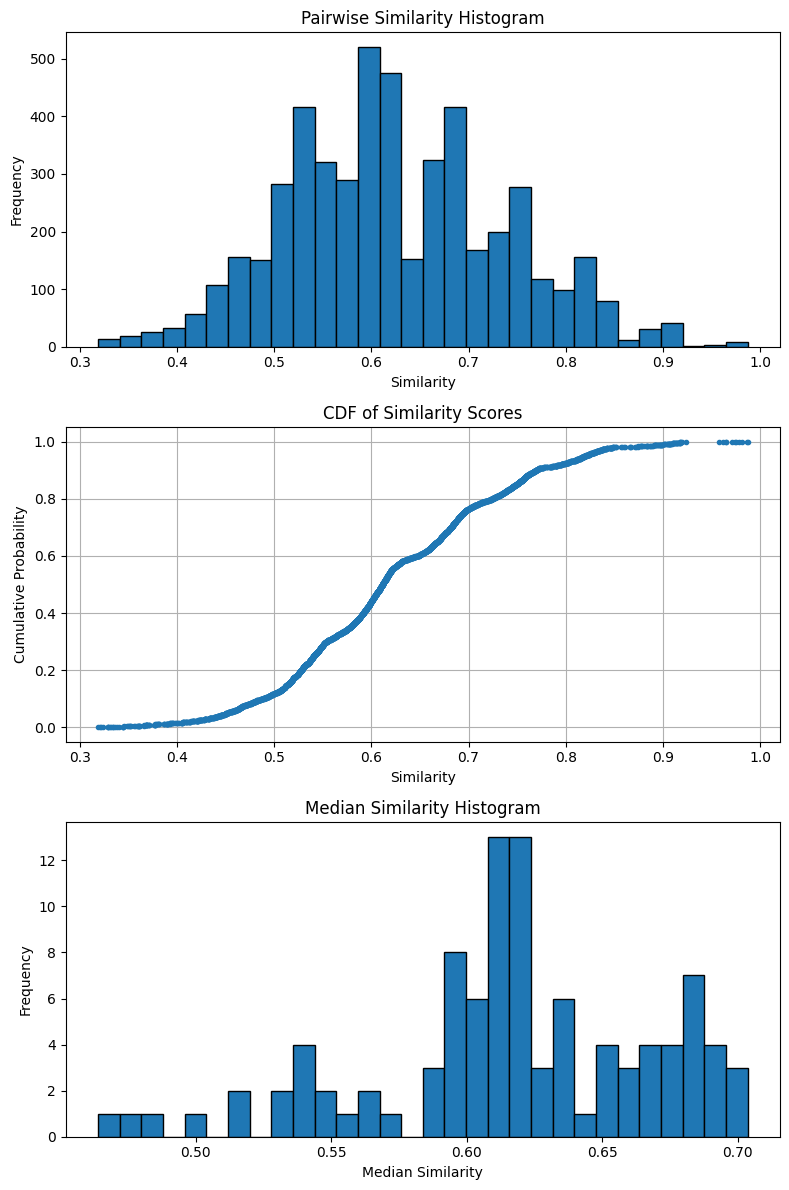

Mean similarity: 0.6236543198207353
Quartiles: [0.54079732 0.61148121 0.6943401 ]


In [3]:
leader = lead.LeaderAlgorithms(X, varinfo, similarity_func='gower', seed=42)

In [4]:
s_min = 0.5

### Leader

In [14]:
dataframe = []
new_X = X
for i in range(10):
    # Shuffle the DataFrame and keep track of the original indices
    shuffled_X = X.sample(frac=1, random_state=i).reset_index()
    original_indices = shuffled_X['index']
    
    # Drop the extra 'index' column to maintain the original structure of the DataFrame
    new_X = shuffled_X.drop(columns='index')

    leader.change_data(new_X)
    k, leaders, clusters = leader.Leader(s_min=s_min, verbose=0)

    avg_leader_sim = leader.avg_leader_sim
    cluster_sizes = leader.cluster_sizes

    # Convert the leaders' indices back to the original DataFrame's indices
    original_leaders_indices = original_indices[leaders].tolist()

    dataframe.append({'Clusters': k, 'Leaders': original_leaders_indices, 'Avg_similarities': avg_leader_sim, 'Sizes': cluster_sizes})
    new_X = X.sample(frac=1, random_state=i)  #.reset_index(drop=True)

df_leader = pd.DataFrame(dataframe)
df_leader

,Clusters,Leaders,Avg_similarities,Sizes
0,10,"[38113, 29974, 15310, 28756, 20709, 39868, 197...","[0.7132530880387353, 0.6325287398751636, 0.584...","[47670, 936, 131, 62, 19, 17, 2, 2, 2, 1]"
1,9,"[391, 27311, 1404, 20276, 13122, 20417, 22317,...","[0.6753898372822418, 0.5908406451245629, 0.666...","[47499, 534, 692, 78, 26, 5, 5, 1, 2]"
2,8,"[41945, 19725, 37324, 22422, 28741, 17538, 343...","[0.6251982856753548, 0.6848762702912258, 0.608...","[42188, 6077, 466, 58, 29, 16, 5, 3]"
3,12,"[15241, 30007, 28586, 20036, 45949, 33307, 163...","[0.6608495622286169, 0.5894802184100394, 0.583...","[47507, 891, 190, 63, 100, 66, 6, 13, 2, 1, 1, 2]"
4,12,"[25988, 47123, 4826, 12655, 26296, 4639, 17540...","[0.6499394892351863, 0.596926787198671, 0.6271...","[47291, 910, 294, 159, 133, 23, 21, 4, 3, 2, 1..."
5,11,"[27816, 29195, 8282, 23320, 22350, 31079, 3833...","[0.683594535085306, 0.6209503513502501, 0.5958...","[45835, 2778, 46, 101, 32, 42, 3, 1, 2, 1, 1]"
6,11,"[40022, 22557, 44025, 8947, 4288, 24619, 42600...","[0.5832479990235143, 0.7078536754201261, 0.600...","[26580, 21147, 553, 398, 110, 39, 2, 9, 1, 2, 1]"
7,12,"[23509, 35050, 23689, 22348, 4656, 48157, 1260...","[0.6985371327187301, 0.6067355775629163, 0.571...","[47134, 1161, 285, 206, 5, 18, 14, 6, 5, 5, 1, 2]"
8,11,"[31677, 27417, 20709, 668, 2561, 157, 46997, 6...","[0.717679409279084, 0.5733590680991575, 0.6094...","[47871, 613, 158, 95, 88, 7, 4, 1, 1, 3, 1]"
9,13,"[31258, 15172, 2784, 31985, 46164, 9106, 8508,...","[0.5793163228719054, 0.6179520307747762, 0.574...","[37969, 9265, 898, 266, 214, 94, 53, 63, 6, 11..."


In [31]:
print(f"Throughout the 10 executions there have been obtained different number of clusters {df_leader['Clusters'].nunique()} times")

total_leaders = set()

for i, row in df_leader.iterrows():
    for l in row['Leaders']:
        total_leaders.add(l)

print(f"The different executions have found {len(total_leaders)} different leaders out of {np.sum(df_leader['Clusters'])} possible ({len(total_leaders) / np.sum(df_leader['Clusters']) *100:.2f}%)")

Throughout the 10 executions there have been obtained different number of clusters 6 times
The different executions have found 93 different leaders out of 109 possible (85.32%)


### Leadaer2

In [16]:
dataframe = []
new_X = X
for i in range(10):
    # Shuffle the DataFrame and keep track of the original indices
    shuffled_X = X.sample(frac=1, random_state=i).reset_index()
    original_indices = shuffled_X['index']
    
    # Drop the extra 'index' column to maintain the original structure of the DataFrame
    new_X = shuffled_X.drop(columns='index')

    leader.change_data(new_X)
    k, leaders, clusters = leader.Leader2(s_min=s_min, verbose=0)

    avg_leader_sim = leader.avg_leader_sim
    cluster_sizes = leader.cluster_sizes

    # Convert the leaders' indices back to the original DataFrame's indices
    original_leaders_indices = original_indices[leaders].tolist()

    dataframe.append({'Clusters': k, 'Leaders': original_leaders_indices, 'Avg_similarities': avg_leader_sim, 'Sizes': cluster_sizes})
    new_X = X.sample(frac=1, random_state=i)  #.reset_index(drop=True)

df_leader2 = pd.DataFrame(dataframe)
df_leader2

,Clusters,Leaders,Avg_similarities,Sizes
0,10,"[38113, 29974, 15310, 28756, 20709, 39868, 197...","[0.7649284950624038, 0.6874299060002695, 0.658...","[32794, 5375, 600, 4568, 1454, 1431, 595, 380,..."
1,9,"[391, 27311, 1404, 20276, 13122, 20417, 22317,...","[0.7288075686884715, 0.6854838774426106, 0.691...","[27218, 7479, 6412, 3199, 1908, 191, 1644, 79,..."
2,8,"[41945, 19725, 37324, 22422, 28741, 17538, 343...","[0.6922305841898632, 0.7026449742569839, 0.669...","[15896, 17859, 7109, 3323, 1545, 361, 1281, 1468]"
3,12,"[15241, 30007, 28586, 20036, 45949, 33307, 163...","[0.7011744838916493, 0.6593941582565374, 0.644...","[28831, 1768, 2478, 2008, 992, 1979, 1776, 638..."
4,12,"[25988, 47123, 4826, 12655, 26296, 4639, 17540...","[0.6998776834692312, 0.6894594946963277, 0.691...","[18346, 3934, 5129, 6447, 825, 2397, 3265, 237..."
5,11,"[27816, 29195, 8282, 23320, 22350, 31079, 3833...","[0.7523294394435924, 0.6810200707461221, 0.645...","[27625, 7540, 478, 5585, 1130, 3200, 524, 537,..."
6,11,"[40022, 22557, 44025, 8947, 4288, 24619, 42600...","[0.666687948860068, 0.7259761732633802, 0.6765...","[5166, 20705, 6428, 1177, 6924, 4582, 83, 524,..."
7,12,"[23509, 35050, 23689, 22348, 4656, 48157, 1260...","[0.7578400646504295, 0.6878788556760377, 0.646...","[30625, 6182, 740, 1073, 389, 661, 1025, 4121,..."
8,11,"[31677, 27417, 20709, 668, 2561, 157, 46997, 6...","[0.755718845367998, 0.6684878222237374, 0.6666...","[36781, 3296, 1903, 594, 2743, 533, 1245, 335,..."
9,13,"[31258, 15172, 2784, 31985, 46164, 9106, 8508,...","[0.6665309221578392, 0.6877784448651141, 0.664...","[5743, 15816, 5096, 1627, 10583, 939, 659, 614..."


In [30]:
print(f"Throughout the 10 executions there have been obtained different number of clusters {df_leader2['Clusters'].nunique()} times")

total_leaders = set()

for i, row in df_leader2.iterrows():
    for l in row['Leaders']:
        total_leaders.add(l)

print(f"The different executions have found {len(total_leaders)} different leaders out of {np.sum(df_leader2['Clusters'])} possible ({len(total_leaders) / np.sum(df_leader2['Clusters']) *100:.2f}%)")

Throughout the 10 executions there have been obtained different number of clusters 6 times
The different executions have found 93 different leaders out of 109 possible (85.32%)


### Leader-Medoid

In [18]:
dataframe = []
new_X = X
for i in range(10):
    # Shuffle the DataFrame and keep track of the original indices
    shuffled_X = X.sample(frac=1, random_state=i).reset_index()
    original_indices = shuffled_X['index']
    
    # Drop the extra 'index' column to maintain the original structure of the DataFrame
    new_X = shuffled_X.drop(columns='index')

    leader.change_data(new_X)
    k, leaders, clusters = leader.Leader_Medoid(s_min=s_min, verbose=0)

    avg_leader_sim = leader.avg_leader_sim
    cluster_sizes = leader.cluster_sizes

    # Convert the leaders' indices back to the original DataFrame's indices
    original_leaders_indices = original_indices[leaders].tolist()

    dataframe.append({'Clusters': k, 'Leaders': original_leaders_indices, 'Avg_similarities': avg_leader_sim, 'Sizes': cluster_sizes})
    new_X = X.sample(frac=1, random_state=i)  #.reset_index(drop=True)

    print(i)

df_leader_med = pd.DataFrame(dataframe)
df_leader_med

0
1
2
3
4
5
6
7
8
9


,Clusters,Leaders,Avg_similarities,Sizes
0,7,"[42585, 37419, 46550, 45883, 42775, 42481, 33201]","[0.8788464098029761, 0.8330261685018956, 0.858...","[21503, 9771, 2775, 8347, 6393, 20, 33]"
1,7,"[34226, 42585, 44466, 45137, 35767, 38747, 43120]","[0.8074690140570397, 0.8677805644963833, 0.778...","[14491, 23662, 5294, 4010, 758, 416, 211]"
2,6,"[42585, 45172, 35992, 47083, 42062, 44626]","[0.8709793183920044, 0.8024534376598916, 0.818...","[22422, 15417, 4595, 5582, 394, 432]"
3,7,"[45172, 42585, 34427, 44883, 46550, 35992, 34721]","[0.8348171563014042, 0.8830947529914825, 0.849...","[9037, 20734, 8847, 3668, 2164, 4163, 229]"
4,8,"[42585, 39184, 45172, 39986, 35651, 44349, 332...","[0.8759948719588587, 0.8387352874378842, 0.824...","[21985, 4155, 10924, 2400, 2172, 6623, 567, 16]"
5,7,"[42585, 42054, 46550, 39174, 45719, 42775, 38148]","[0.8771063818020705, 0.8232124837740685, 0.854...","[22198, 11268, 2803, 3437, 4183, 4728, 225]"
6,7,"[45259, 42585, 32990, 45883, 32806, 33624, 1825]","[0.8365604872802637, 0.8783041026820957, 0.830...","[8953, 21634, 8484, 7172, 1719, 352, 528]"
7,6,"[42585, 40201, 34226, 36628, 46550, 42775]","[0.8770692562040296, 0.8482909716993905, 0.820...","[21606, 9097, 10036, 3928, 1582, 2593]"
8,5,"[42585, 42054, 46550, 40784, 38277]","[0.8745371729418036, 0.80554252491795, 0.81777...","[22260, 15160, 4452, 6307, 663]"
9,6,"[42585, 34226, 46550, 34762, 40201, 9147]","[0.8617494441503284, 0.795192499237798, 0.8325...","[24887, 17873, 4081, 1115, 885, 1]"


In [29]:
print(f"Throughout the 10 executions there have been obtained different number of clusters {df_leader_med['Clusters'].nunique()} times")

total_leaders = set()

for i, row in df_leader_med.iterrows():
    for l in row['Leaders']:
        total_leaders.add(l)

print(f"The different executions have found {len(total_leaders)} different leaders out of {np.sum(df_leader_med['Clusters'])} possible ({len(total_leaders) / np.sum(df_leader_med['Clusters']) *100:.2f}%)")

Throughout the 10 executions there have been obtained different number of clusters 4 times
The different executions have found 41 different leaders out of 66 possible (62.12%)


### Leader2 Medoid

In [5]:
dataframe = []
new_X = X
for i in range(10):
    # Shuffle the DataFrame and keep track of the original indices
    shuffled_X = X.sample(frac=1, random_state=i).reset_index()
    original_indices = shuffled_X['index']
    
    # Drop the extra 'index' column to maintain the original structure of the DataFrame
    new_X = shuffled_X.drop(columns='index')

    leader.change_data(new_X)
    k, leaders, clusters = leader.Leader2_Medoid(s_min=s_min, verbose=0)

    avg_leader_sim = leader.avg_leader_sim
    cluster_sizes = leader.cluster_sizes

    # Convert the leaders' indices back to the original DataFrame's indices
    original_leaders_indices = original_indices[leaders].tolist()

    dataframe.append({'Clusters': k, 'Leaders': original_leaders_indices, 'Avg_similarities': avg_leader_sim, 'Sizes': cluster_sizes})
    new_X = X.sample(frac=1, random_state=i)  #.reset_index(drop=True)

    print(i)

df_leader2_med = pd.DataFrame(dataframe)
df_leader2_med

0
1
2
3
4
5
6
7
8
9


,Clusters,Leaders,Avg_similarities,Sizes
0,7,"[42585, 45883, 44349, 39986, 42775, 41823, 569]","[0.8839782598870535, 0.8229190292719635, 0.847...","[20689, 8968, 9381, 3242, 5430, 944, 188]"
1,6,"[34186, 42585, 46876, 42775, 48397, 33738]","[0.8339850505804487, 0.8774469232037768, 0.812...","[9545, 22052, 8201, 6991, 1653, 400]"
2,5,"[42585, 45172, 37158, 46550, 42775]","[0.8750837111218992, 0.8070096214361203, 0.826...","[22132, 14612, 4320, 1922, 5856]"
3,7,"[46876, 42585, 34427, 46550, 42775, 32959, 36628]","[0.8145673587433501, 0.8816762684771224, 0.844...","[8547, 21298, 9426, 3420, 4859, 236, 1056]"
4,6,"[42585, 39184, 45172, 48397, 46579, 32754]","[0.8727711773297834, 0.8248303593952321, 0.801...","[22498, 5059, 17064, 2698, 1306, 217]"
5,6,"[42585, 42054, 46550, 35992, 9147, 42775]","[0.8744650274954162, 0.8185207256515741, 0.859...","[22707, 12543, 2735, 6240, 30, 4587]"
6,7,"[45259, 42585, 32990, 45883, 48397, 27466, 569]","[0.8372121044401715, 0.8792891535255518, 0.833...","[8898, 21560, 8262, 7295, 2123, 210, 494]"
7,6,"[42585, 40201, 35992, 48397, 45259, 9147]","[0.8853353518276473, 0.8492467082422479, 0.820...","[20484, 8129, 7306, 3728, 9148, 47]"
8,6,"[42585, 34226, 46000, 44883, 35992, 43452]","[0.8751975296658095, 0.811053550011869, 0.8282...","[22262, 10690, 8724, 4773, 1735, 658]"
9,6,"[42585, 34226, 46550, 34762, 32754, 1825]","[0.862925301898996, 0.7964055804593992, 0.8341...","[24892, 17953, 4046, 1219, 358, 374]"


In [6]:
print(f"Throughout the 10 executions there have been obtained different number of clusters {df_leader2_med['Clusters'].nunique()} times")

total_leaders = set()

for i, row in df_leader2_med.iterrows():
    for l in row['Leaders']:
        total_leaders.add(l)

print(f"The different executions have found {len(total_leaders)} different leaders out of {np.sum(df_leader2_med['Clusters'])} possible ({len(total_leaders) / np.sum(df_leader2_med['Clusters']) *100:.2f}%)")

Throughout the 10 executions there have been obtained different number of clusters 3 times
The different executions have found 33 different leaders out of 62 possible (53.23%)


### Leader3 Medoid

In [12]:
dataframe = []
new_X = X
for i in range(10):
    # Shuffle the DataFrame and keep track of the original indices
    shuffled_X = X.sample(frac=1, random_state=i).reset_index()
    original_indices = shuffled_X['index']
    
    # Drop the extra 'index' column to maintain the original structure of the DataFrame
    new_X = shuffled_X.drop(columns='index')

    leader.change_data(new_X)
    k, leaders, clusters = leader.Leader3_Medoid(s_min=s_min, verbose=0)

    avg_leader_sim = leader.avg_leader_sim
    cluster_sizes = leader.cluster_sizes

    # Convert the leaders' indices back to the original DataFrame's indices
    original_leaders_indices = original_indices[leaders].tolist()

    dataframe.append({'Clusters': k, 'Leaders': original_leaders_indices, 'Avg_similarities': avg_leader_sim, 'Sizes': cluster_sizes})
    new_X = X.sample(frac=1, random_state=i)  #.reset_index(drop=True)

    print(i)

df_leader3_med = pd.DataFrame(dataframe)
df_leader3_med

0
1
2
3
4
5
6
7
8
9


,Clusters,Leaders,Avg_similarities,Sizes
0,8,"[42585, 45883, 33758, 32806, 44409, 33812, 225...","[0.8872082889354209, 0.8464519853749389, 0.880...","[20175, 6806, 5355, 2771, 5925, 5792, 120, 1898]"
1,7,"[37507, 37788, 38959, 45883, 41880, 33738, 43452]","[0.8660277733039117, 0.8830247076504609, 0.860...","[5364, 21076, 4709, 6676, 7652, 361, 3004]"
2,5,"[42585, 45172, 37158, 46550, 42775]","[0.8819042768348441, 0.8352165758584917, 0.833...","[21297, 9994, 4970, 3008, 9573]"
3,7,"[45850, 42585, 34427, 43120, 47564, 45539, 36428]","[0.8450758998667837, 0.8874135012920096, 0.868...","[5409, 20145, 7370, 3288, 5953, 3035, 3642]"
4,6,"[46357, 37404, 42775, 48397, 36130, 47400]","[0.8836301303661301, 0.8468013935491263, 0.848...","[20871, 8563, 7672, 2882, 7094, 1760]"
5,6,"[46357, 46398, 46550, 35992, 9147, 47564]","[0.8800627553095708, 0.835541015556957, 0.8625...","[22117, 9291, 2853, 5915, 25, 8641]"
6,7,"[40487, 42585, 45883, 44409, 32806, 36428, 39184]","[0.8631137972231253, 0.8848674640985673, 0.857...","[7145, 20779, 5238, 7186, 2470, 2357, 3667]"
7,6,"[42585, 37545, 48397, 37337, 44883, 38277]","[0.8850866896174439, 0.8112546121498789, 0.831...","[20518, 9385, 3725, 9614, 5033, 567]"
8,5,"[42585, 43131, 35992, 47289, 48397]","[0.8830801209499952, 0.8544594254743306, 0.822...","[21105, 6381, 7096, 10705, 3555]"
9,7,"[42585, 48579, 36130, 46550, 42775, 33201, 569]","[0.8822145282514967, 0.8521405823011319, 0.838...","[21113, 8204, 7559, 2695, 7648, 1417, 206]"


In [14]:
print(f"Throughout the 10 executions there have been obtained different number of clusters {df_leader3_med['Clusters'].nunique()} times")

total_leaders = set()

for i, row in df_leader3_med.iterrows():
    for l in row['Leaders']:
        total_leaders.add(l)

print(f"The different executions have found {len(total_leaders)} different leaders out of {np.sum(df_leader3_med['Clusters'])} possible ({len(total_leaders) / np.sum(df_leader3_med['Clusters']) *100:.2f}%)")

Throughout the 10 executions there have been obtained different number of clusters 4 times
The different executions have found 42 different leaders out of 64 possible (65.62%)


### Plots and visualizations

In [9]:
import matplotlib.pyplot as plt

def plot_hist_sizes(df):
    # Assuming df_leader is the DataFrame containing your clustering results
    fig, axes = plt.subplots(5, 2, figsize=(10, 15))  # Adjust the figure size as needed

    # Flatten the axes array for easier indexing
    axes = axes.flatten()

    for i, row in df.iterrows():
        axes[i].bar([f"Cluster {j+1}" for j in range(len(row['Sizes']))], row['Sizes'])
        axes[i].set_title(f"Iteration {i+1}")
        axes[i].set_xlabel("Clusters")
        axes[i].set_ylabel("Sizes")
        axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

    # Adjust layout to prevent overlapping
    plt.tight_layout()

    # Display the plot
    plt.show()


In [10]:
plot_hist_sizes(df_leader)

NameError: name 'df_leader2' is not defined

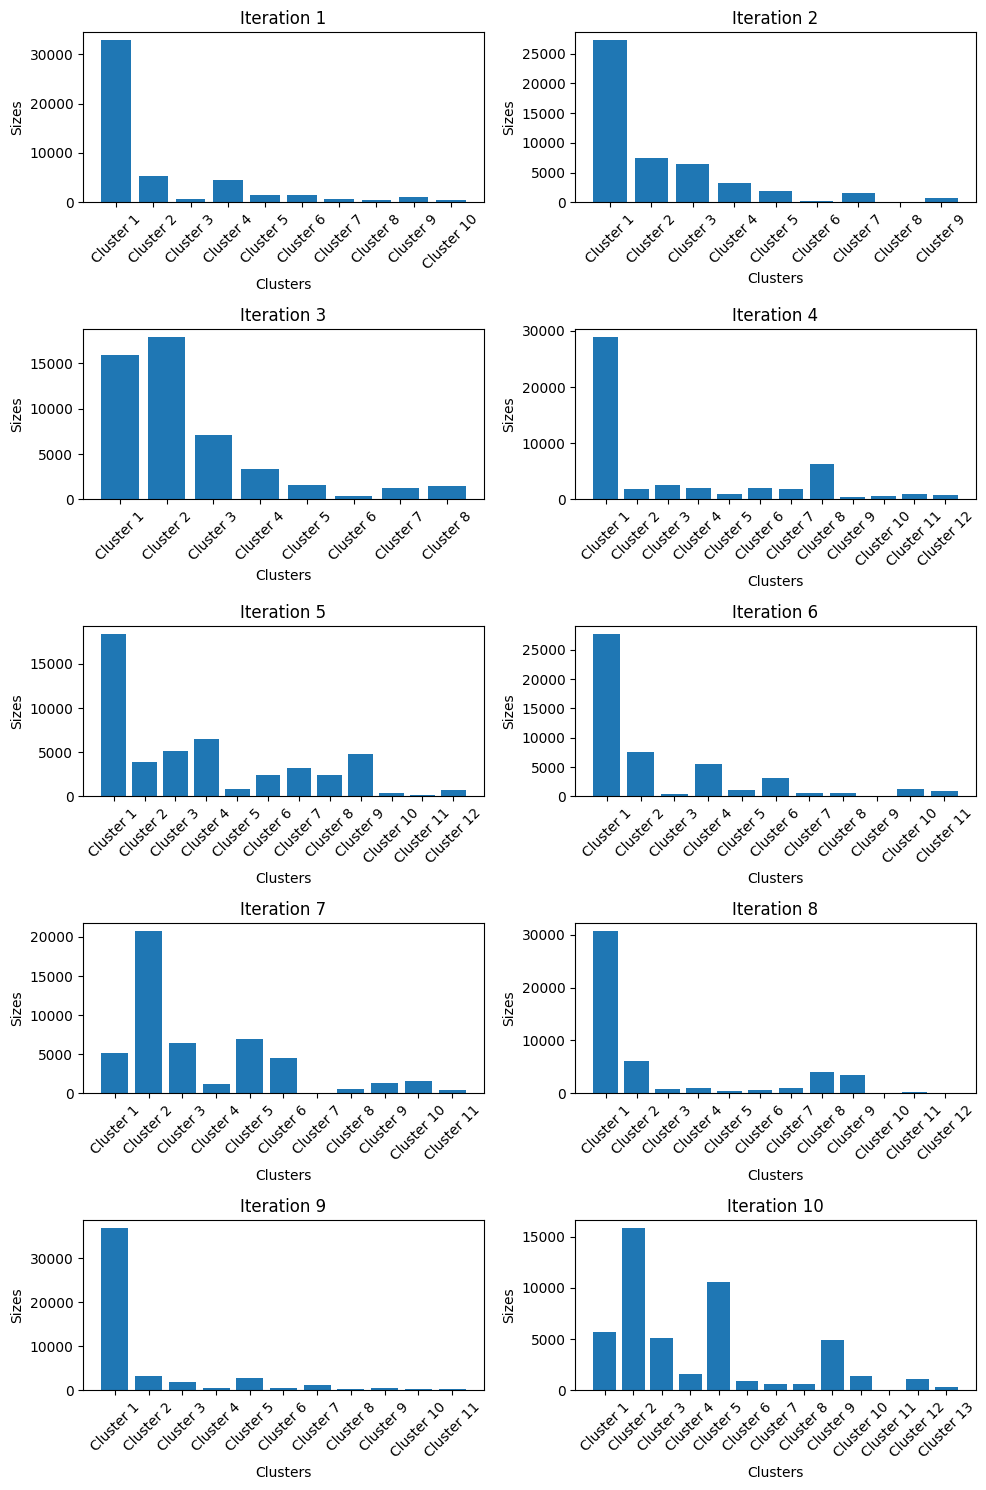

In [26]:
plot_hist_sizes(df_leader2)

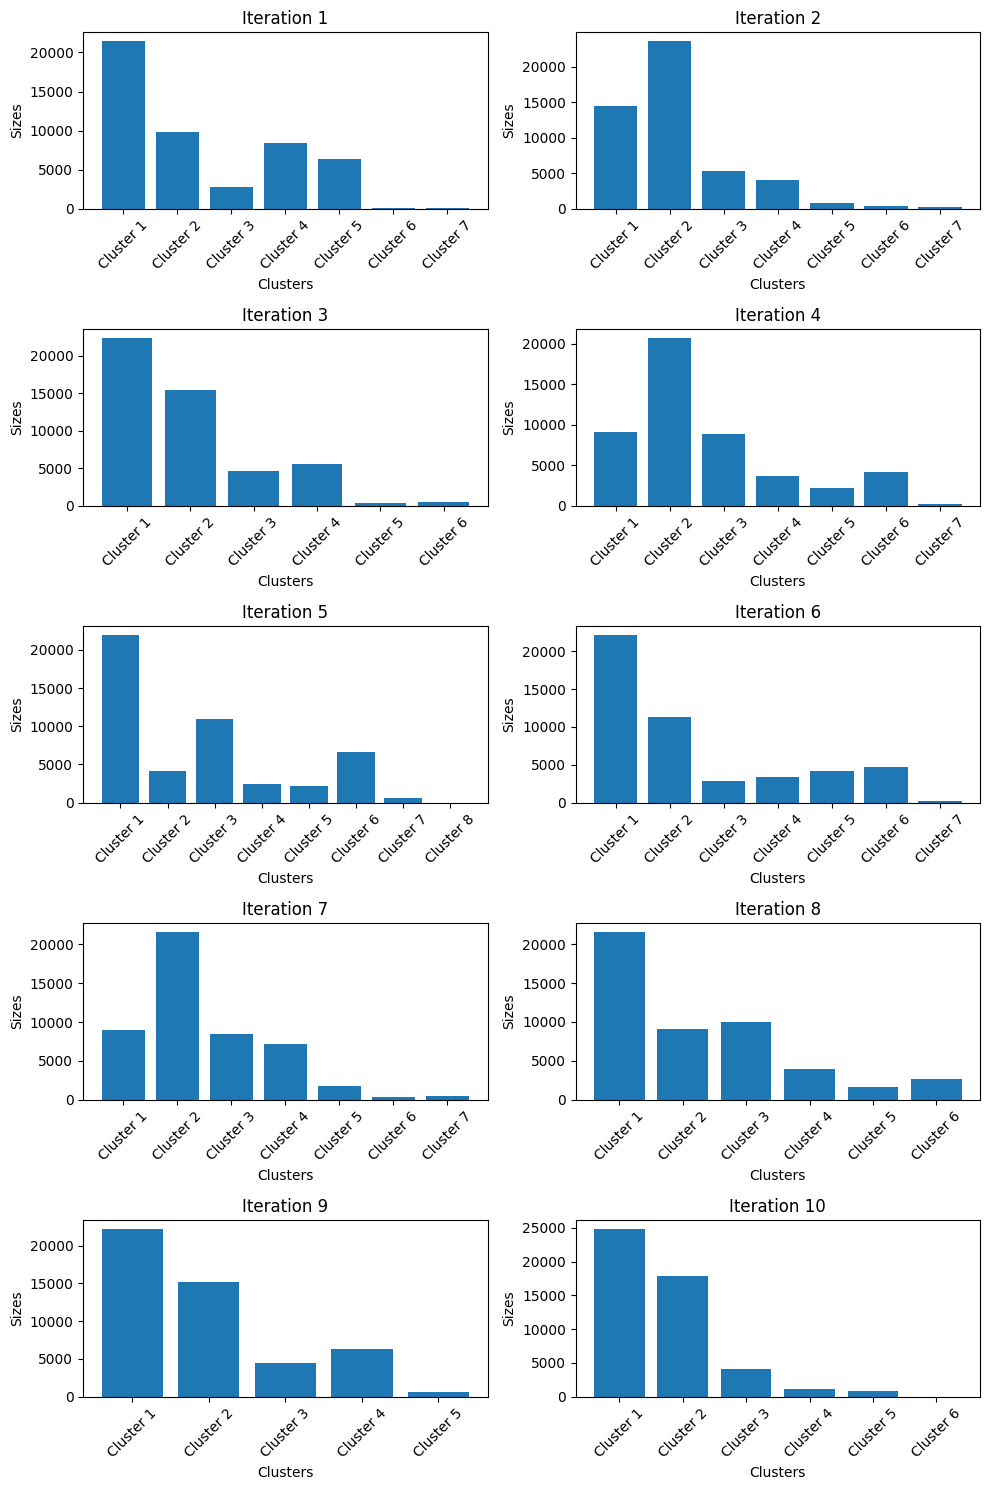

In [27]:
plot_hist_sizes(df_leader_med)

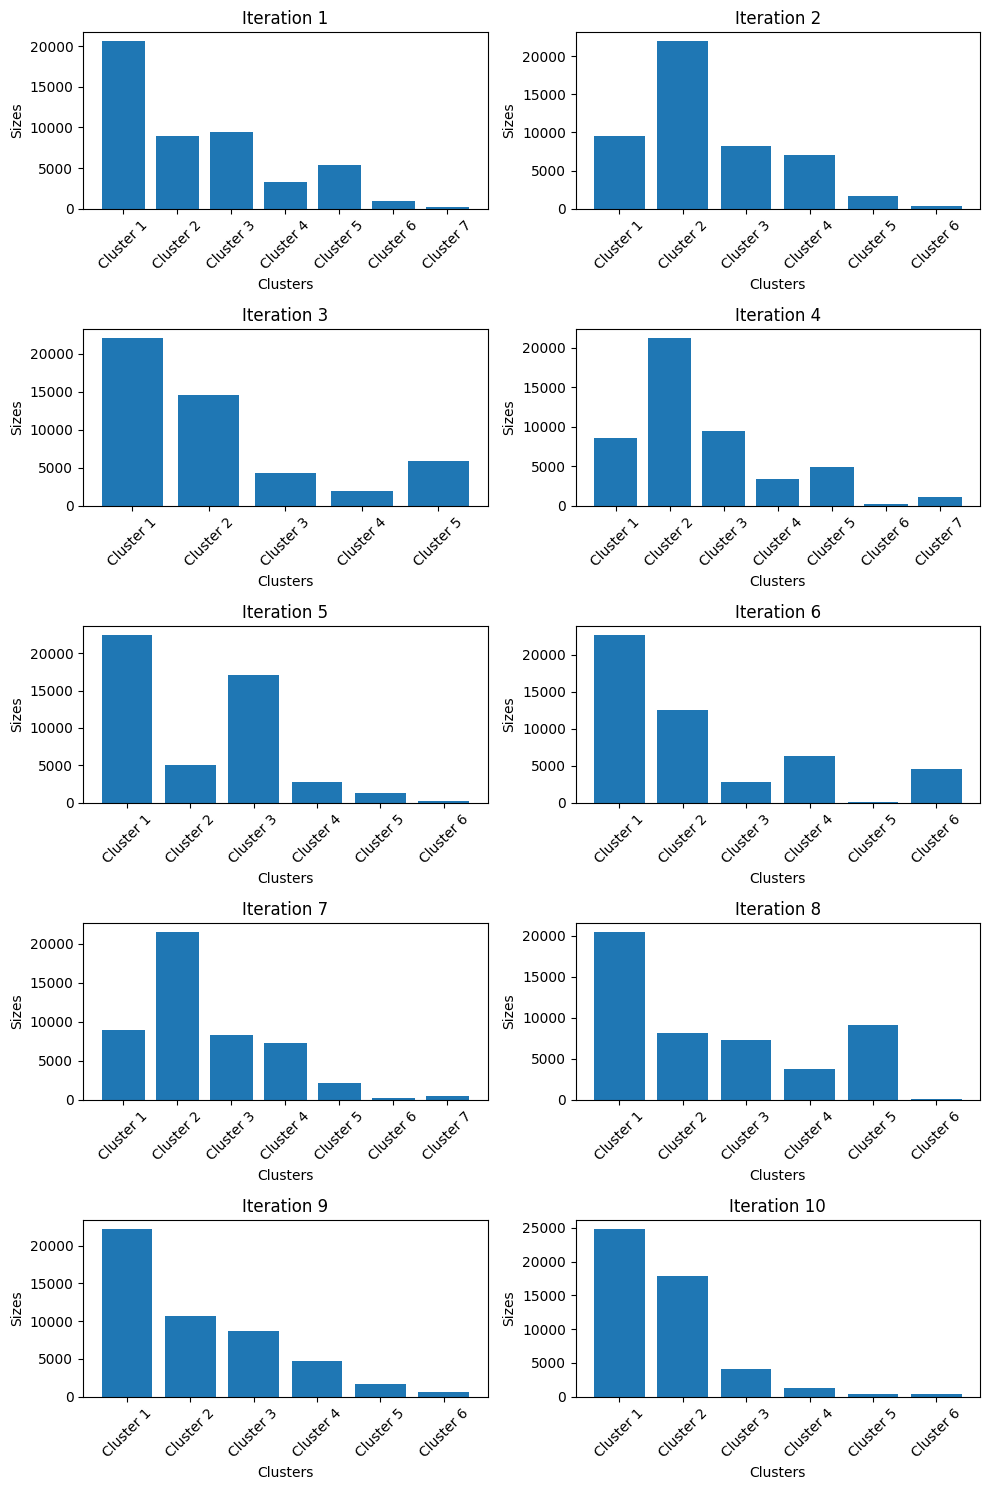

In [11]:
plot_hist_sizes(df_leader2_med)

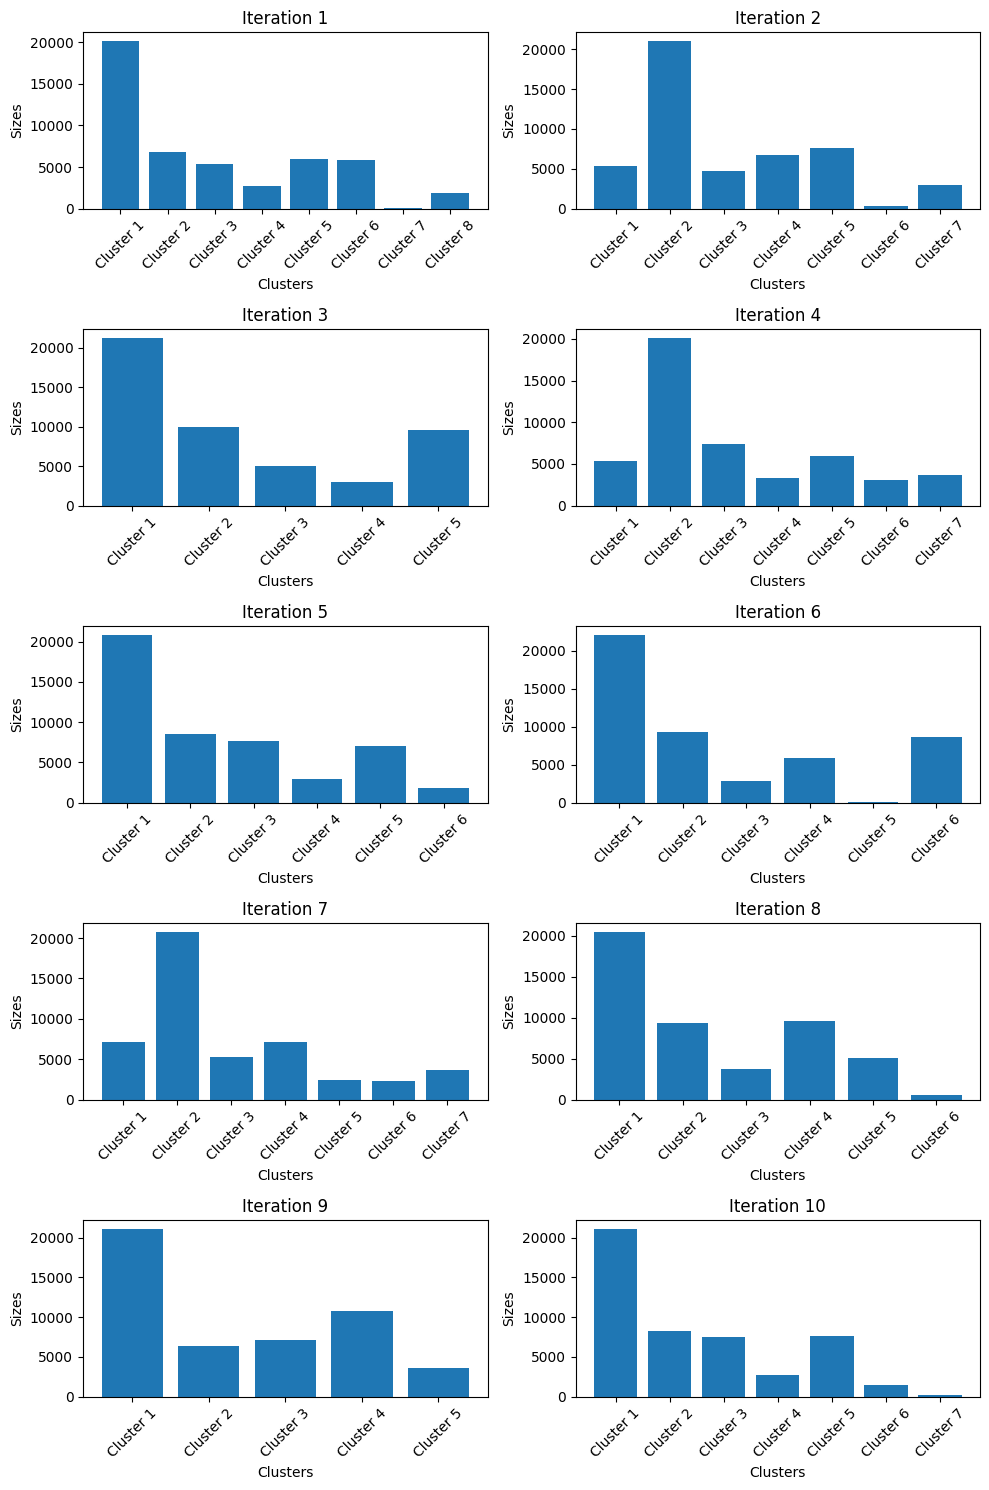

In [15]:
plot_hist_sizes(df_leader3_med)

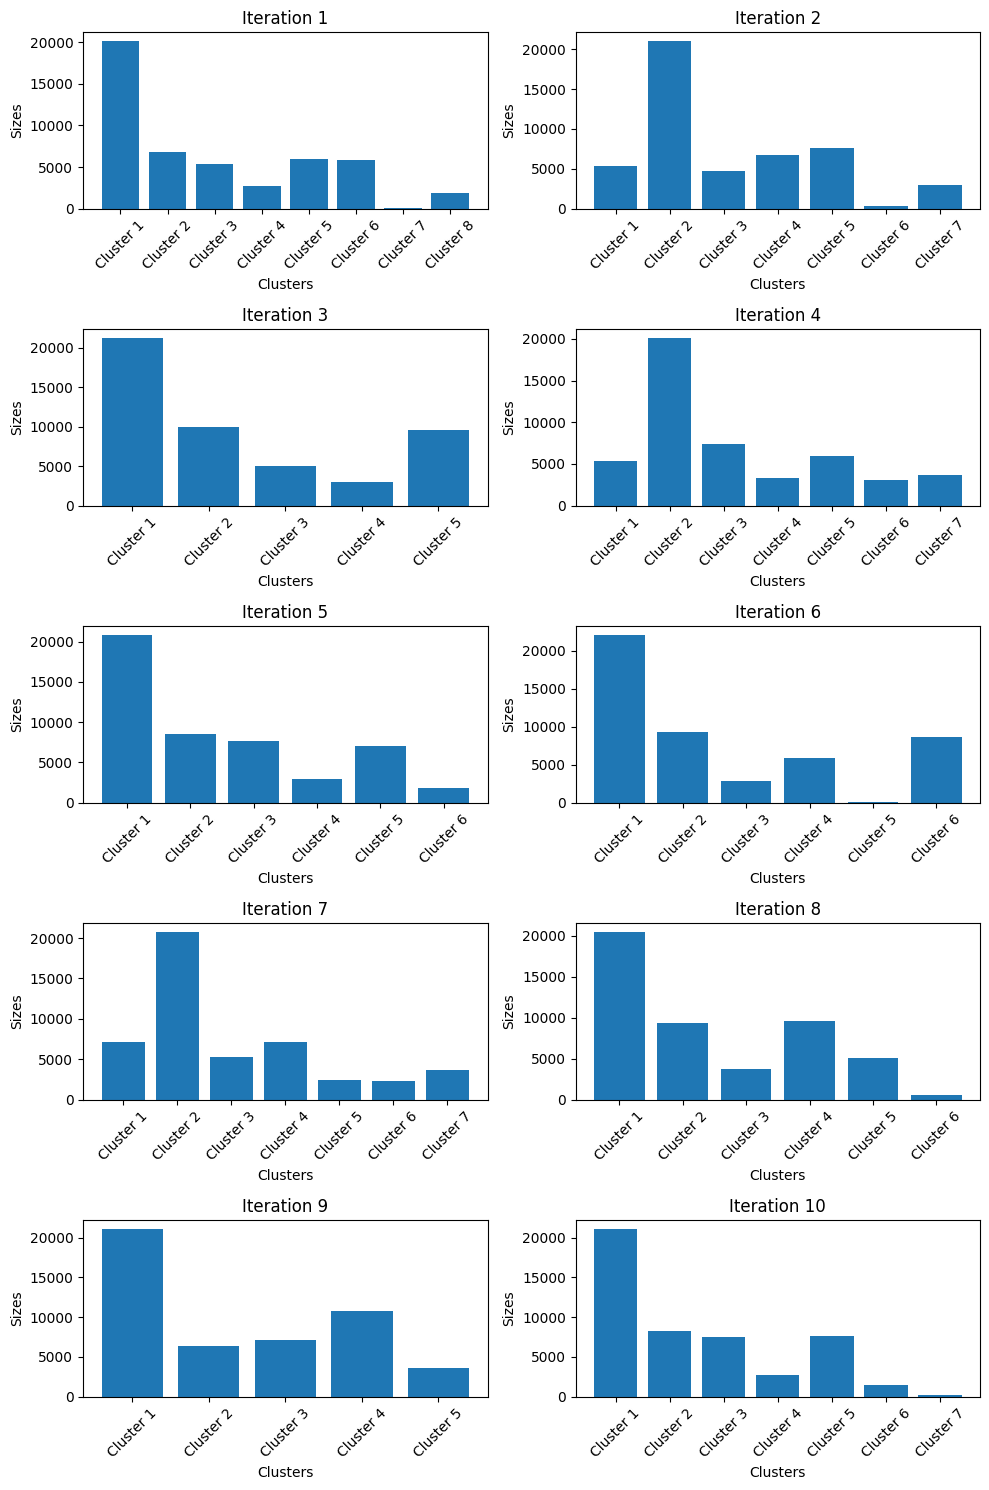

In [ ]:
plot_hist_sizes(df_leader3_med)